# 单变量线性回归

吴明晖

浙江大学城市学院

2018.10

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用Tensorflow进行算法设计与训练的核心步骤" data-toc-modified-id="使用Tensorflow进行算法设计与训练的核心步骤-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用Tensorflow进行算法设计与训练的核心步骤</a></span></li><li><span><a href="#Tensorflow实现单变量线性回归" data-toc-modified-id="Tensorflow实现单变量线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow实现单变量线性回归</a></span><ul class="toc-item"><li><span><a href="#生成数据" data-toc-modified-id="生成数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>生成数据</a></span></li><li><span><a href="#构建模型" data-toc-modified-id="构建模型-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>构建模型</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#进行预测" data-toc-modified-id="进行预测-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>进行预测</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# 使用Tensorflow进行算法设计与训练的核心步骤

- ** （1）生成数据 **
- ** （2）构建模型 **
- ** （3）训练模型 **
- ** （4）进行预测 **

上述步骤是我们使用Tensorflow进行算法设计与训练的核心步骤，贯穿于后面介绍的具体实战中。<br> 本章用一个简单的例子来讲解这几个步骤。



# 有监督机器学习过程示意图

<img src="机器学习过程示意图.png">

# Tensorflow实现单变量线性回归

假设我们要学习的函数为线性函数$ y=2x+1 $

## 生成数据

In [1]:
#在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会现实图像
%matplotlib inline

import matplotlib.pyplot as plt # 载入matplotlib
import numpy as np # 载入numpy
import tensorflow as tf # 载入Tensorflow

np.random.seed(5)

C:\Users\mingh\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mingh\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mingh\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mingh\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework

** 首先，生成输入数据。 ** <br> 我们需要构造满足这个函数的$x$和$y$同时加入一些不满足方程的噪声.

In [2]:
#直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间

x_data = np.linspace(-1, 1, 100) 

# y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致

y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4  

In [3]:
# numpy.random.randn(d0, d1, …, dn) 是从标准正态分布中返回一个或多个样本值
# 标准正态分布又称为u分布，是以0为均值、以1为标准差的正态分布，记为N（0，1）

np.random.randn(10)

array([ 0.79242262,  0.17076445, -1.75374086,  0.63029648,  0.49832921,
        1.01813761, -0.84646862,  2.52080763, -1.23238611,  0.72695326])

In [4]:
# x_data.shape值为一个元组

x_data.shape

(100,)

In [5]:
# 实参的前面加上*和**时，就意味着拆包。单个*表示将元组拆成一个个单独的实参

np.random.randn(*x_data.shape)

array([ 0.04595522, -0.48713265,  0.81613236, -0.28143012, -2.33562182,
       -1.16727845,  0.45765807,  2.23796561, -1.4812592 , -0.01694532,
        1.45073354,  0.60687032, -0.37562084, -1.42192455, -1.7811513 ,
       -0.74790579, -0.36840953, -2.24911813, -1.69367504,  0.30364847,
       -0.40899234, -0.75483059, -0.40751917, -0.81262476,  0.92751621,
        1.63995407,  2.07361553,  0.70979786,  0.74715259,  1.46309548,
        1.73844881,  1.46520488,  1.21228341, -0.6346525 , -1.5996985 ,
        0.87715281, -0.09383245, -0.05567103, -0.88942073, -1.30095145,
        1.40216662,  0.46510099, -1.06503262,  0.39042061,  0.30560017,
        0.52184949,  2.23327081, -0.0347021 , -1.27962318,  0.03654264,
       -0.64635659,  0.54856784,  0.21054246,  0.34650175, -0.56705117,
        0.41367881, -0.51025606,  0.51725935, -0.30100513, -1.11840643,
        0.49852362, -0.70609387,  1.4438811 ,  0.44295626,  0.46770521,
        0.10134479, -0.05935198, -2.38669774,  1.22217056, -0.81

In [6]:
# 本例中，np.random.randn(*x_data.shape) 和 np.random.randn(100) 功能相同

np.random.randn(100)

array([-1.02957349, -1.33628031, -0.61056736,  0.52469426, -0.34930813,
       -0.44073846, -1.1212876 ,  1.47284473, -0.62337224, -1.08070195,
       -0.12253009, -0.8077431 , -0.23255622,  1.33515034, -0.44645673,
       -0.04978868, -0.36854478, -0.19173957,  0.81967992,  0.53163372,
       -0.34161504, -0.93090048, -0.13421699,  0.83259361, -0.01735327,
       -0.12765822, -1.80791662,  0.99396898, -1.49112886, -1.28210748,
       -0.37570741,  0.03464388,  0.04507816, -0.76374689, -0.31313851,
       -0.60698954, -1.80955123, -0.25551774, -0.69379935,  0.41919776,
       -0.14520019,  0.9638013 ,  0.69622199,  0.89940546,  1.20837807,
        0.6932537 , -0.16636061,  1.35311311, -0.92862651, -0.03547249,
        0.85964595, -0.28749661,  0.71494995, -0.8034526 , -0.54048196,
        0.54617743,  0.71188926,  1.19715449, -0.07006703,  0.29822712,
        0.62619261,  0.46743206, -1.30262143, -0.57008965,  1.44295001,
       -1.24399513,  0.62888033, -0.42559213,  1.00320956, -0.77

In [7]:
y_data = 2 * x_data + 1.0 + np.random.randn(100) * 0.4 

### Jupyter使用小技巧
可以使用Tab健进行代码补齐

** 利用matplotlib画图 **

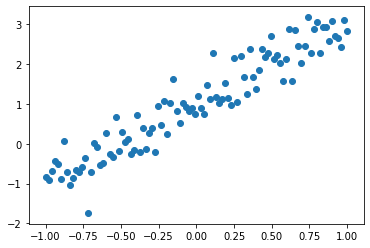

In [8]:
#画出随机生成数据的散点图

plt.scatter(x_data, y_data) 

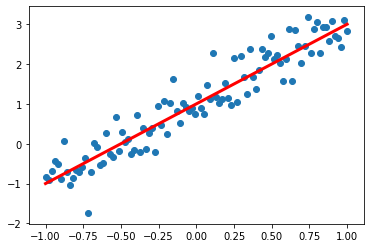

In [9]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 

# 画出我们想要学习到的线性函数 y = 2x +1

plt.plot (x_data, 2 * x_data + 1.0, color = 'red',linewidth=3) 

## 构建模型

** 定义$x$和$y$的占位符 **

In [10]:
# 定义训练数据的占位符，x是特征值，y是标签值

x = tf.placeholder("float", name = "x") 
y = tf.placeholder("float", name = "y")

AttributeError: module 'tensorflow' has no attribute 'placeholder'

** 构建回归模型 **

In [11]:
def model(x, w, b):
    return tf.multiply(x, w) + b 

** 创建变量 **
<br>
- Tensorflow变量的声明函数是tf.Variable
- tf.Variable的作用是保存和更新参数
- 变量的初始值可以是随机数、常数，或是通过其他变量的初始值计算得到

In [12]:
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0, name="w0")

# 构建线性函数的截距，变量b
b = tf.Variable(0.0, name="b0")   

In [13]:
# pred是预测值，前向计算
pred = model(x, w, b) 

NameError: name 'x' is not defined

## 训练模型

** 设置训练参数 **

In [14]:
# 迭代次数（训练轮数）
train_epochs = 10

# 学习率
learning_rate = 0.05 

# 控制显示loss值的粒度
display_step = 10

** 关于学习率（learning_rate）的设置 **<br>
- 学习率的作用：控制参数更新的幅度。
- 如果学习率设置过大，可能导致参数在极值附近来回摇摆，无法保证收敛。
- 如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。

** 定义损失函数 **
<br>
- 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
- 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）

In [15]:
# 采用均方差作为损失函数

loss_function = tf.reduce_mean(tf.square(y-pred))  

** 选择优化器 **

In [16]:
# 梯度下降优化器

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

** 声明会话 **

In [17]:
sess = tf.Session()

** 变量初始化 **
- 在真正执行计算之前，需将所有变量初始化
- 通过** tf.global_variables_initializer **函数可实现对所有变量的初始化

In [18]:
init = tf.global_variables_initializer()

sess.run(init)

** 执行训练 **

Train Epoch: 01 Step: 010 loss= 0.053888980
Train Epoch: 01 Step: 020 loss= 0.000218245
Train Epoch: 01 Step: 030 loss= 0.019443041
Train Epoch: 01 Step: 040 loss= 0.589532554
Train Epoch: 01 Step: 050 loss= 0.000989183
Train Epoch: 01 Step: 060 loss= 0.142488658
Train Epoch: 01 Step: 070 loss= 0.046271212
Train Epoch: 01 Step: 080 loss= 0.008660123
Train Epoch: 01 Step: 090 loss= 0.241159379
Train Epoch: 01 Step: 100 loss= 0.000514947
Train Epoch: 02 Step: 110 loss= 0.317517459
Train Epoch: 02 Step: 120 loss= 0.032397330
Train Epoch: 02 Step: 130 loss= 0.093368128
Train Epoch: 02 Step: 140 loss= 0.332103789
Train Epoch: 02 Step: 150 loss= 0.060521714
Train Epoch: 02 Step: 160 loss= 0.024084859
Train Epoch: 02 Step: 170 loss= 0.178793266
Train Epoch: 02 Step: 180 loss= 0.006461896
Train Epoch: 02 Step: 190 loss= 0.129687995
Train Epoch: 02 Step: 200 loss= 0.013333416
Train Epoch: 03 Step: 210 loss= 0.129900724
Train Epoch: 03 Step: 220 loss= 0.023582600
Train Epoch: 03 Step: 230 loss= 

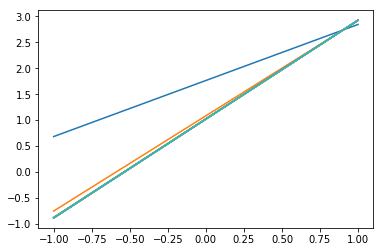

In [19]:
# 开始训练，轮数为 epoch，采用SGD随机梯度下降优化方法
step = 0   # 记录训练步数
loss_list = []   # 用于保存loss值的列表

for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss=sess.run([optimizer,loss_function], feed_dict={x: xs, y: ys}) 
        
        # 显示损失值 loss
        # display_step：控制报告的粒度
        # 例如，如果 display_step 设为 2 ，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改 display_step 不会更改模型所学习的规律
        loss_list.append(loss)
        step=step+1
        if step % display_step == 0:
            print("Train Epoch:", '%02d' % (epoch+1), "Step: %03d" % (step),"loss=", \
                  "{:.9f}".format(loss))
        
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot (x_data, w0temp * x_data + b0temp  )# 画图


从上图可以看出，由于本案例所拟合的模型较简单，训练3次之后已经接近收敛。<br> 对于复杂模型，需要更多次训练才能收敛。

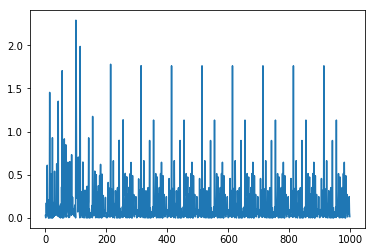

In [20]:
plt.plot(loss_list)

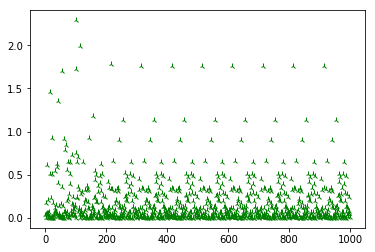

In [21]:
plt.plot(loss_list,'g2')

In [ ]:
[x for x in loss_list if x>1]

** 打印结果 **

In [22]:
print ("w：", sess.run(w)) # w的值应该在2附近 
print ("b：", sess.run(b)) # b的值应该在1附近 

w： 1.9070293
b： 1.0205086


** 可视化 **

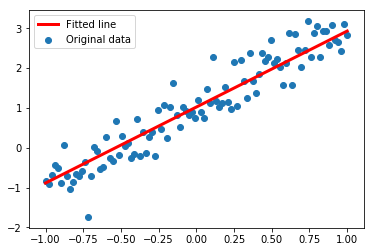

In [23]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot (x_data, x_data * sess.run(w) + sess.run(b),\
          label='Fitted line',color='r', linewidth=3)
plt.legend(loc=2)# 通过参数loc指定图例位置

## 进行预测

In [ ]:
x_test = 3.21

predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：%f" % predict)

target = 2 * x_test + 1.0
print("目标值：%f" % target)

In [ ]:
x_test = 3.21
predict = sess.run(w) * x_test + sess.run(b)
print("预测值：%f" % predict)

** 以上是利用Tensorflow训练一个线性模型并进行预测的完整过程。<br> 通过逐渐降低损失值loss来训练参数$w$和$b$拟合 $y = 2x + 1$中的系数2和1。 ** 

# 小结

** 通过一个简单的例子介绍了利用Tensorflow实现机器学习的思路，重点讲解了下述步骤： ** <br>
** - （1）生成人工数据集及其可视化 ** <br>
** - （2）构建线性模型 **<br>
** - （3）定义损失函数 **<br>
** - （4）最小化损失函数 **<br>
** - （5）训练结果的可视化 **<br>
** - （6）利用学习到的模型进行预测 **

